# Running TopoFlow for the Galana River, Kenya

#### Table of Contents

1.  <a href="#Import">Import Required Packages</a> <br>
2.  <a href="#Intro">Introduction</a> <br>
3.  <a href="#Test1">CHIRPS 6-hr Rainfall, with No Infiltration</a> <br>
4.  <a href="#show_grid">Show One Grid from the RTS File</a> <br>
5.  <a href="#plot_data">Plot a Time Series for Outlet Values</a> <br>
6.  <a href="#Test2">CHIRPS 6-hr Rainfall, with Richards 1D Infiltration</a> <br>

## Import Required Packages <a id="Import"></a>

In [1]:
from topoflow import main
from topoflow.framework import emeli
examples_dir = emeli.paths['examples']
import os, os.path
from topoflow.utils import visualize as tfvis
from topoflow.utils import rts_files

# from topoflow.utils import rtg_files

home_dir   = os.path.expanduser("~")
cfg_prefix = 'Test1'
cfg_dir    = home_dir + '/TF_Tests/Galana_120sec/Test1_cfg/'
output_dir = home_dir + '/TF_Tests/Galana_120sec/'

print('Examples directory  =', examples_dir)
print('Your Home directory =', home_dir)
print('CFG directory       =', cfg_dir)
print('Output directory    =', output_dir)


Importing TopoFlow 3.6 package modules:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
 
Examples directory  = /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/examples/
Your Home directory = /Users/peckhams
CFG directory       = /Users/peckhams/TF_Tests/Galana_120sec/Test1_cfg/
Output directory    = /Users/peckhams/TF_Tests/Galana_120sec/


## Introduction <a id="Intro"></a>

This notebook assumes that you are already familiar with the basic concepts of TopoFlow and how to run it.  The Jupyter notebook called <b>TopoFlow_Getting_Started.ipynb</b> provides that information.

This notebook also assumes that you have already created all of the input files needed to run TopoFlow for the Tana River basin.  The Jupyter notebook called <b>TopoFlow_Prepare_Input_Data.ipynb</b> can be used for that purpose.

## Test1:  CHIRPS Rainfall & Runoff, with No Infiltration  <a id="Test1"></a>

In this test, we use space-time rainfall from the CHIRPS rainfall product, as specified in the CFG file for the Meteorology component.  (Note that the timestep, dt in Test1_meteorology.cfg should be set to: 21600 seconds, or 6 hours.) For the channel flow process, we use the Kinematic Wave method.  So only 2 process components are enabled, namely:  <b>Meteorology</b> and <b>Channels - Kinematic Wave</b>.  All other processes (infiltration, evaporation, snowmelt, icemelt, diversions) have <b>comp_status</b> set to Disabled in their CFG files.  The case prefix for this scenario is <b>Test1</b>.

In [2]:
main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir)

EMELI: Reading info from provider_file:
    /Users/peckhams/TF_Tests/Galana_120sec/Test1_cfg/Test1_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_attenuate
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 0.0 [mmph]
   max(P) = 0.002659299780383151 [mmph]
 
Imported netCDF4 version: 1.5.7
EMELI: Initialized component: tf_me

## Show a Grid from a Grid Stack in an RTS File  <a id="show_grid"></a>

Byte swap needed = False
Number of grids in RTS file  = 13140
Reading one grid from RTS file... 
  time_index = 13139
extent = [36.3, 40.233333333333, -3.573333333333, -0.94]
min(grid), max(grid) = 0.0 54.587894
Finished.



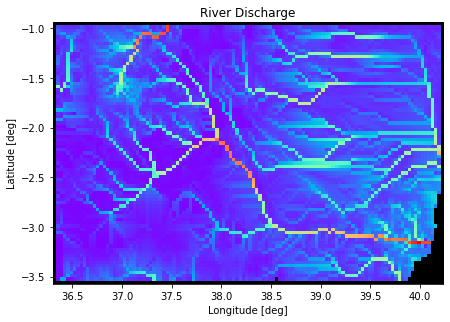

In [3]:
long_name = 'River Discharge'
rts_filename = output_dir + cfg_prefix + '_2D-Q.rts'
rts = rts_files.rts_file()
OK  = rts.open_file( rts_filename )
if not(OK):
    print('Sorry, Could not open RTS file:')
    print( rts_filename )

n_grids = int( rts.number_of_grids() )
# time_index = 2
# time_index = int(n_grids / 2)
time_index = int(n_grids - 1)
byte_swap  = rts.byte_swap_needed()
grid   = rts.read_grid( time_index )   # alias to get_grid()
extent = rts.get_bounds()
rts.close_file()

print('Byte swap needed =', byte_swap )
print('Number of grids in RTS file  =', n_grids)
print('Reading one grid from RTS file... ')
print('  time_index =', time_index )
print('extent =', extent)
print('min(grid), max(grid) =', grid.min(), grid.max())
print('Finished.')
print()

tfvis.show_grid_as_image( grid, long_name, extent=extent,
                          BLACK_ZERO=True,
                          cmap='rainbow', stretch='power', p=0.3,
                          # a=1, b=2, p=0.5,
                          xsize=7, ysize=7, dpi=None)

## Plot a Time Series for Outlet Values  <a id="plot_data"></a>

var_names in netCDF file =
['time', 'datetime', 'Q_66_113', 'Q_66_112']
var longitudes =
[40.08333333333333, 40.05]
var latitudes =
[-3.1566666666663337, -3.1566666666663337]



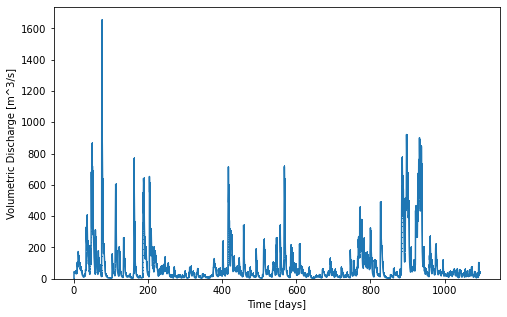

In [4]:
os.chdir(output_dir)
var_index = 3
nc_file = cfg_prefix + '_0D-Q.nc'
# nc_file = cfg_prefix + '_0D-d-flood.nc'

tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=var_index,
                       marker=',', REPORT=True, xsize=8, ysize=5)

# Save the image to a file instead
# im_file = cfg_prefix + '_0D-Q.png'
# # im_file = cfg_prefix + '_0D-d-flood.png'
# tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=var_index,
#                           marker=',', REPORT=True, xsize=10, ysize=4,
#                           im_file=im_file)

In [5]:
from topoflow.utils import ncts_files
ncts = ncts_files.ncts_file()

# output_dir = '/Users/peckhams/TF_Tests/Tana_120sec/'
nc_file = output_dir + 'Test1' + '_0D-Q.nc'
# nc_file = cfg_prefix + '_0D-Q.nc'
ncts.open_file( nc_file )
var_name_list = ncts.get_var_names()
var_index = 2
var_name = var_name_list[ var_index ]
ts_values = ncts.get_values( var_name )
ts_times  = ncts.get_times()
ts_datetimes = ncts.get_datetimes()

values    = ts_values[:]
times     = ts_times[:]
datetimes = ts_datetimes[:]
print('n_values    =', values.size)
print('n_times     =', times.size)
print('Qmin, Qmax  =', values.min(), values.max())
print('tmin, tmax  =', times.min(), times.max())
print('times.dtype =', times.dtype)
print()
print('times[-10:-1] =')
print(times[-10:-1])
# print(times[-94])
print('datetimes[0:10] =')
print(datetimes[0:10])

n_values    = 2976
n_times     = 2976
Qmin, Qmax  = 0.0 175.67279
tmin, tmax  = 0.0 44625.0
times.dtype = float64

times[-10:-1] =
[44490. 44505. 44520. 44535. 44550. 44565. 44580. 44595. 44610.]
datetimes[0:10] =
['2015-10-01 00:00:00' '2015-10-01 00:15:00' '2015-10-01 00:30:00'
 '2015-10-01 00:45:00' '2015-10-01 01:00:00' '2015-10-01 01:15:00'
 '2015-10-01 01:30:00' '2015-10-01 01:45:00' '2015-10-01 02:00:00'
 '2015-10-01 02:15:00']


## Test2:  CHIRPS Rainfall, with Richards 1D Infiltration <a id="Test2"></a>

In this test, we use everything exactly as in Test1, except we Enable the Richard 1D Infiltration component. So now only 3 process components are enabled, namely:  <b>Meteorology</b>, <b>Channels - Kinematic Wave</b> and <b>Infiltration - Richards 1D</b>.  All other processes (evaporation, snowmelt, icemelt, diversions) have <b>comp_status</b> set to Disabled in their CFG files.  The case prefix for this scenario is <b>Test2</b>.

<b>Note:</b>  There is a problem when we set slope_file to
site_prefix_new-slope.rtg, instead of site_prefix_slope.rtg in the channel process CFG file.

In [6]:
cfg_prefix = 'Test2'
cfg_dir    = home_dir + '/TF_Tests/Tana_120sec/Test2_cfg/'
output_dir = home_dir + '/TF_Tests/Tana_120sec/Test2_Output'

main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir)

EMELI: Reading info from provider_file:
    /Users/peckhams/TF_Tests/Tana_120sec/Test2_cfg/Test2_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Reading config file into component state.
In met_base read_input_files():
   time = 0.0
   min(P) = 0.0 [mmph]
   max(P) = 0.0052423921204081125 [mmph]
 
------------------------------------------
 NOTE: Since PRECIP_ON

RuntimeError: Negative or NaN depth found.

## Show a Grid from a Grid Stack in an RTS File  <a id="show_grid"></a>

In [ ]:
long_name = 'River Discharge'
rts_filename = output_dir + cfg_prefix + '_2D-Q.rts'
rts = rts_files.rts_file()
OK  = rts.open_file( rts_filename )
if not(OK):
    print('Sorry, Could not open RTS file:')
    print( rts_filename )

n_grids = int( rts.number_of_grids() )
# time_index = 2
# time_index = int(n_grids / 2)
time_index = int(n_grids - 1)
byte_swap  = rts.byte_swap_needed()
grid   = rts.read_grid( time_index )   # alias to get_grid()
extent = rts.get_bounds()
rts.close_file()

print('Byte swap needed =', byte_swap )
print('Number of grids in RTS file  =', n_grids)
print('Reading one grid from RTS file... ')
print('  time_index =', time_index )
print('extent =', extent)
print('min(grid), max(grid) =', grid.min(), grid.max())
print('Finished.')
print()

tfvis.show_grid_as_image( grid, long_name, extent=extent,
                          BLACK_ZERO=True,
                          cmap='rainbow', stretch='power', p=0.3,
                          # a=1, b=2, p=0.5,
                          xsize=7, ysize=7, dpi=None)

## Plot a Time Series for Outlet Values  <a id="plot_data"></a>

In [ ]:
os.chdir(output_dir)
var_index = 3
nc_file = cfg_prefix + '_0D-Q.nc'
# nc_file = cfg_prefix + '_0D-d-flood.nc'

tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=var_index,
                       marker=',', REPORT=True, xsize=8, ysize=5)

# Save the image to a file instead
# im_file = cfg_prefix + '_0D-Q.png'
# # im_file = cfg_prefix + '_0D-d-flood.png'
# tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=var_index,
#                           marker=',', REPORT=True, xsize=10, ysize=4,
#                           im_file=im_file)